In [28]:
def dot_val(th,X):
    """
    th - (n+1)x1
    X - 1x(n+1)
    """ 
    import numpy as np
    out=X@th
    return out[0][0]
def hval(th,X):
    """
    th - (n+1)x1
    X - 1x(n+1)
    """ 
    from math import exp
    out=1/(1+exp((-1)*dot_val(th,X)))
    return out
def probab(th,X,y):
    """
    X - mx(n+1)
    y- mx1
    th - (n+1)x1
    """
    from math import log
    ZERO=1.0e-16
    m=y.shape[0]
    n=th.shape[0]-1
    s=0.0
    for i in range(m):
        t=X[i].reshape(1,n+1)
        ht=hval(th,t)
        temp=y[i][0]
#         if (abs(ht)<=ZERO or abs(1-ht)<=ZERO):
#             return 'c'
        #print(ht)
        s+=temp*log(ht)+(1-temp)*log(1-ht)
    return s

In [3]:
def repl_th(th,X,y):
    """
    th - (n+1)x1
    X - mx(n+1)
    y- mx1
    """
    import numpy as np
    ZERO=1.0e-16
    m=y.shape[0]
    n=th.shape[0]-1
    H=np.zeros((n+1)**2)
    H=H.reshape(n+1,n+1)
    dJ=np.zeros(n+1)
    dJ=dJ.reshape(n+1,1)
    for i in range(m):
        t1=X[i].reshape(1,n+1)
        t2=np.transpose(t1)
        ht=hval(th,t1)
        H=H+(ht*(1-ht))*(t2@t1)
        dJ=dJ+(ht-y[i][0])*t2
    H=H/m
#     print(H)
#     dJ=np.zeros(n+1)
#     dJ=dJ.reshape(n+1,1)
#     for i in range(m):
#         t1=X[i].reshape(1,n+1)
#         t2=np.transpose(t1)
#         dJ=dJ+(hval(th,t1)-y[i][0])*t2
    dJ=dJ/m
#     print(dJ)
#     if (abs(np.linalg.det(H))<=ZERO):
#         return 'd'
    temp1=np.linalg.pinv(H)
    temp=(temp1)@dJ
#     print(temp1)
#     print(temp)
    for j in range(n+1):
        th[j]-=temp[j]
#     print(th)
    return 0

In [4]:
def newt_meth(X,y):
    """
    X - mx(n+1)
    y- mx1
    test - 1x(n+1)
    """
    ERR=1.0e-10
    import numpy as np
    #alp=1.0e-5
    m=y.shape[0]
    n=X.shape[1]-1
    th=np.zeros(n+1)
    th=th.reshape(n+1,1)
    j0=probab(th,X,y)
    conv=j0
    print(conv)
    it=0
    while (abs(conv)>=ERR):
        if (repl_th(th,X,y)=='d'):
            break
        j1=probab(th,X,y)
        if (j1=='c'):
            break
        #print(j1)
        conv=j1-j0
        print(conv)
        j0=j1
        it+=1
    print(conv)
    print(it)
    return th
#     if hval(th,test)>=0.5:
#         return(1,it)
#     return(0,it)

In [31]:
import numpy as np
al=np.loadtxt("../Epoch/Selection_Hackathon/Dataset.csv",delimiter=',',skiprows=1)
#al=np.c_[np.ones(1599),al]
for i in range(1599):
    al[i][0]/=10
    al[i][5]/=10
    al[i][6]/=10
    al[i][10]/=10
    al[i][12]/=10
    al[i][15]/=100
al
al.shape

(1599, 17)

In [35]:
temp=al[:,15]
c=0
for i in range(1599):
    if temp[i]>1.0:
        print(i+2,temp[i])
        c+=1
c

242 1.24
255 1.075
532 2.8
537 2.8
616 1.03
762 1.1555555560000002
775 4.4
776 2.25
845 1.0222222220000001
1056 1.54
1057 1.54
1186 1.081818182
1190 1.081818182
1237 1.883333333
1369 1.1666666669999999


15

In [79]:
y_plot=al[:,11]
x_plot=np.delete(al,11,axis=1)

In [83]:
x_plot[0]

array([0.74      , 0.7       , 0.        , 1.9       , 0.076     ,
       1.1       , 3.4       , 0.9978    , 3.51      , 0.56      ,
       0.94      , 0.81      , 4.05      , 0.636     , 0.30909091,
       0.608     ])

ValueError: x and y must be the same size

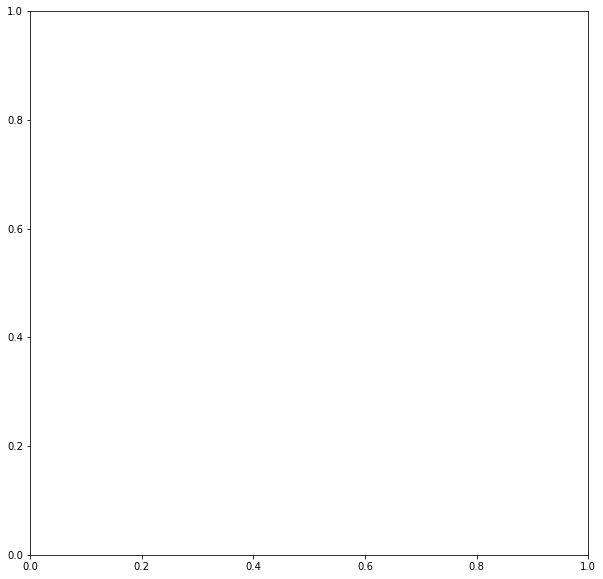

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.DataFrame(al,columns=["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides",
                            "free sulfur dioxide","total sulfur dioxide","density","pH","sulphates",
                            "alcohol","quality","k_value","l_value","m_value","percentage_free_sulphur",
                            "n_value"])
df.plot(x=["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides",
                            "free sulfur dioxide","total sulfur dioxide","density","pH","sulphates",
                            "alcohol","k_value","l_value","m_value","percentage_free_sulphur",
                            "n_value"],y="quality",kind="scatter",figsize=(10,10))
plt.show()

In [6]:
al_un=np.unique(al,axis=0)
al_un
al_un.shape

(1359, 18)

In [7]:
1359/5

271.8

In [8]:
1359-271

1088

In [13]:
x1=al_un[271:,:]
print(x1)
x1.shape

[[1.         0.7        0.22       ... 0.885      0.125      0.6325    ]
 [1.         0.7        0.23       ... 0.693      0.31904762 0.5915    ]
 [1.         0.7        0.36       ... 0.626      0.325      0.775     ]
 ...
 [1.         1.56       0.645      ... 0.835      0.23       1.4055    ]
 [1.         1.56       0.685      ... 0.78       0.71666667 1.312     ]
 [1.         1.59       0.36       ... 0.936      0.32272727 2.428     ]]


(1088, 18)

In [24]:
x=np.delete(x1,12,axis=1)
x[5]
x.shape

(1088, 17)

In [37]:
y=x1[:,12]
y=y.reshape(1088,1)

In [28]:
te=al_un[:271,:]
te=np.delete(te,12,axis=1)
te.shape

(271, 17)

In [32]:
teans=al_un[:271,12]
teans=teans.reshape(271,1)
teans.shape

(271, 1)

In [38]:
th=newt_meth(x,y)

-754.1441324492025
195.53606750295535
13.257977475149346
0.4495650880047606
0.009209384425616918
0.0002594012184999883
7.840290777494374e-06
2.602860149636399e-08
1.2842065189033747e-09
3.865352482534945e-12
3.865352482534945e-12
9


In [39]:
th

array([[-18.0050385 ],
       [ 17.56813247],
       [ -1.98129153],
       [  0.08202729],
       [  2.48710137],
       [ -6.04584386],
       [  0.25303097],
       [ -0.196643  ],
       [  9.37396613],
       [ -0.21648012],
       [ -4.99244275],
       [ 10.07805396],
       [-18.39960517],
       [  0.32095811],
       [  7.22505042],
       [  0.68852598],
       [ -8.35498373]])

In [56]:
def min_max_test(x,y,th):
    """
    th - (n+1)x1
    x - mx(n+1)
    y - mx1
    """
    m=y.shape[0]
    n=x.shape[1]-1
    import numpy as np
    max_1=(-1)*np.Infinity
    min_1=np.Infinity
    for i in range(m):
        temp=x[i].reshape(1,n+1)
        hv=hval(th,temp)
        if (y[i]==1.0 and hv<min_1):
            min_1=hv
        elif (y[i]==0.0 and hv>max_1):
            max_1=hv
    return(min_1,max_1)

In [68]:
def av_low_high(x,y,th):
    """
    th - (n+1)x1
    x - mx(n+1)
    y - mx1
    """
    m=y.shape[0]
    n=x.shape[1]-1
    s_0=0.0
    n_0=0
    s_1=0.0
    n_1=0
    for i in range(m):
        temp=x[i].reshape(1,n+1)
        ht=hval(th,temp)
        if (y[i]==1.0):
            s_1+=ht
            n_1+=1
        elif (y[i]==0.0):
            s_0+=ht
            n_0+=1
    return(s_0/float(n_0),s_1/float(n_1))

In [52]:
min_1,max_1=min_max_test(x,y,th)
av=(min_1+max_1)/2
min_1,max_1

(0.06435583580977243, 0.9955980569389695)

In [71]:
av_0,av_1=av_low_high(x,y,th)
av1=(av_0+av_1)/2
av1

(0.3467854518739999, 0.6836877926396273)

In [73]:
c=0
for i in range(271):
    temp=te[i].reshape(1,17)
    if (hval(th,temp)>=0.5 and teans[i]==1.0):
        c+=1
    elif (hval(th,temp)<0.5 and teans[i]==0.0):
        c+=1
c

194

In [36]:
(0.3467854518739999+0.6836877926396273)/2

0.5152366222568137

In [25]:
def j_th(th,x,y):
    import numpy as np
    m=x.shape[0]
    n=x.shape[1]-1
    temp=1.0/(1+np.exp(-1*(x@th)))
    out=(y*(np.log(temp))+(1-y)*(np.log(1-temp)))
    s=float(np.sum(out))
    return(-1*s/m)
def newt_method(x,y):
    EPS=1.0e-10
    m=x.shape[0]
    n=x.shape[1]-1
    th=np.zeros(n+1)
    th=th.reshape(n+1,1)
    conv=np.Infinity
    j0=j_th(th,x,y)
    it=0
    while abs(conv)>EPS:
        it+=1
        temp1=1.0/(1.0+np.exp(-1*x@th))
        H=((np.transpose(x))@((temp1)*(1-temp1)*x))
        H=H/m
        dJ=np.sum(((temp1-y)*x/m),axis=0)
        dJ=dJ.reshape(n+1,1)
        temp2=(np.linalg.pinv(H))@dJ
        print(np.linalg.pinv(H))
        print(dJ)
        print(temp2)
        th=th-temp2
        j1=j_th(th,x,y)
        conv=j1-j0
        j0=j1
    print(it)
    return th

In [8]:
us=[]
for i in range(17):
    us.append(i)
del us[11]
us

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16]

In [9]:
import numpy as np
X=np.loadtxt("../Epoch/Selection_Hackathon/Dataset.csv",delimiter=',',skiprows=321,usecols=us)
X=np.c_[np.ones(1279),X]
for i in range(1279):
    X[i][1]/=10
    X[i][6]/=10
    X[i][7]/=10
    X[i][11]/=10
    X[i][12]/=10
    X[i][15]/=100
#     X[i,1:18]/=100
print(X)
print(X.shape)

[[1.         0.98       0.66       ... 0.793      0.28095238 1.0795    ]
 [1.         0.93       0.61       ... 0.71       0.348      1.117     ]
 [1.         0.78       0.62       ... 0.709      0.3        0.7395    ]
 ...
 [1.         0.63       0.51       ... 0.826      0.13793103 0.754     ]
 [1.         0.59       0.645      ... 0.785      0.1375     0.6615    ]
 [1.         0.6        0.31       ... 0.727      0.23333333 1.2075    ]]
(1279, 17)


In [10]:
y=np.loadtxt("../Epoch/Selection_Hackathon/Dataset.csv",delimiter=',',skiprows=321,usecols=[11])
y=y.reshape(1279,1)
print(y)

[[1.]
 [0.]
 [0.]
 ...
 [1.]
 [0.]
 [1.]]


In [11]:
te=np.loadtxt("../Epoch/Selection_Hackathon/Dataset.csv",delimiter=',',skiprows=1,max_rows=320,usecols=us)
#print(te.shape)
te=np.c_[np.ones(320),te]
for i in range(320):
    te[i][1]/=10
    te[i][6]/=10
    te[i][7]/=10
    te[i][11]/=10
    te[i][12]/=10
    te[i][15]/=100
#     te[i,1:18]/=100
print(te)
print(te.shape)

[[1.         0.74       0.7        ... 0.636      0.30909091 0.608     ]
 [1.         0.78       0.88       ... 0.778      0.268      0.829     ]
 [1.         0.78       0.76       ... 0.742      0.36       0.744     ]
 ...
 [1.         0.96       0.77       ... 0.722      0.24666667 0.935     ]
 [1.         0.98       0.66       ... 0.793      0.28095238 1.0795    ]
 [1.         0.96       0.77       ... 0.722      0.24666667 0.935     ]]
(320, 17)


In [12]:
teans=np.loadtxt("../Epoch/Selection_Hackathon/Dataset.csv",delimiter=',',skiprows=1,max_rows=320,usecols=[11])
teans=teans.reshape(320,1)
print(teans.shape)

(320, 1)


In [26]:
th=newt_method(X,y)

[[ 6.55814465e+06  2.45985756e+03 -1.13896725e+03 -5.90610701e+02
   2.04488388e+03  3.45416696e+03 -5.46992055e+02  1.53685354e+02
  -6.69309930e+06  3.34448196e+04  3.05696580e+03 -6.44570800e+04
   2.34595019e+03  1.17298085e+04  6.51113051e+03  1.62718835e+03
   2.22242536e+03]
 [ 2.45984060e+03  4.69958912e+00 -2.89897436e+01 -2.63126685e+01
  -9.85699977e-01  2.54074437e+01 -1.34666859e+00  6.69640098e-01
  -2.56414775e+03  2.75025652e+01 -1.35760069e+01 -2.31363952e+01
   1.80061072e+00  9.00307542e+00  1.18314359e+01 -1.26176923e+00
   7.14547770e+00]
 [-1.13896894e+03 -2.89897474e+01  2.47956496e+02  1.85341401e+02
   1.34474419e+01 -1.86777759e+02  1.01128809e+01 -4.39772183e+00
   1.31350681e+03 -7.48615914e+01  1.15421320e+02  1.92679641e+01
  -4.19409583e+00 -2.09704898e+01 -7.13564392e+01  1.48296334e+01
  -5.22863667e+01]
 [-5.90605201e+02 -2.63126681e+01  1.85341400e+02  3.68933667e+02
   1.59767633e+01 -2.78621288e+02  1.12616583e+01 -5.75844707e+00
   7.53541429e+02 -

In [27]:
th

array([[ 3.31231127e+01],
       [ 2.62897084e-01],
       [-2.70825073e+00],
       [-3.72235788e-01],
       [ 5.77473287e-01],
       [-3.77840338e+00],
       [ 2.23110454e-01],
       [-1.44412066e-01],
       [-3.89538990e+01],
       [-1.29963753e+00],
       [ 3.97708878e+00],
       [ 9.19020308e+00],
       [-7.92804087e-03],
       [-3.96399427e-02],
       [ 1.98685382e-01],
       [ 5.84064085e-01],
       [-1.79040698e+00]])

In [38]:
c=0
for i in range(320):
    temp=te[i].reshape(1,17)
    if (hval(th,temp)>=0.5 and teans[i]==1.0):
        c+=1
    elif (hval(th,temp)<0.5 and teans[i]==0.0):
        c+=1
c

223

In [78]:
import numpy as np
al=np.loadtxt("../Epoch/Selection_Hackathon/Dataset.csv",delimiter=',',skiprows=1)
#al=np.c_[np.ones(1599),al]
for i in range(1599):
    al[i][0]/=10
    al[i][5]/=10
    al[i][6]/=10
    al[i][10]/=10
    al[i][12]/=10
    al[i][15]/=100
al
al.shape

(1599, 17)

In [79]:
temp=al[:,15]
c=0
for i in range(1599):
    if temp[i]>1.0:
        al=np.delete(al,i,axis=0)
print(al)
al.shape

[[0.74       0.7        0.         ... 0.636      0.30909091 0.608     ]
 [0.78       0.88       0.         ... 0.778      0.268      0.829     ]
 [0.78       0.76       0.04       ... 0.742      0.36       0.744     ]
 ...
 [0.63       0.51       0.13       ... 0.826      0.13793103 0.754     ]
 [0.59       0.645      0.12       ... 0.785      0.1375     0.6615    ]
 [0.6        0.31       0.47       ... 0.727      0.23333333 1.2075    ]]


(1584, 17)

In [41]:
1584/5

316.8

In [47]:
temp=al[:,8]
c=0
for i in range(1584):
    if (temp[i]>0.0 and temp[i]<14.0):
        c+=1
#         print(temp[i])
c

1584

In [49]:
al.shape

(1584, 17)

In [50]:
1584-316

1268

In [80]:
al

array([[0.74      , 0.7       , 0.        , ..., 0.636     , 0.30909091,
        0.608     ],
       [0.78      , 0.88      , 0.        , ..., 0.778     , 0.268     ,
        0.829     ],
       [0.78      , 0.76      , 0.04      , ..., 0.742     , 0.36      ,
        0.744     ],
       ...,
       [0.63      , 0.51      , 0.13      , ..., 0.826     , 0.13793103,
        0.754     ],
       [0.59      , 0.645     , 0.12      , ..., 0.785     , 0.1375    ,
        0.6615    ],
       [0.6       , 0.31      , 0.47      , ..., 0.727     , 0.23333333,
        1.2075    ]])

In [65]:
y1=al[316:,11]
teans1=al[:316,11]
teans1=teans1.reshape(316,1)
y1=y1.reshape(1268,1)
print(y1.shape)
print(teans1.shape)

(1268, 1)
(316, 1)


In [83]:
x1=np.delete(al,11,axis=1)
te1=x1[:316,:]
te1=np.c_[np.ones(316),te1]
x1=x1[316:,:]
x1=np.c_[np.ones(1268),x1]
print(x1.shape)
print(te1.shape)

(1268, 17)
(316, 17)


In [84]:
th1=newt_method(x1,y1)


[[ 6.55235555e+06  2.41446710e+03 -8.49845173e+02 -2.42742697e+02
   2.05808394e+03  3.11922428e+03 -5.30720776e+02  1.45702045e+02
  -6.68638122e+06  3.32710855e+04  3.21952783e+03 -6.44947065e+04
   2.32947635e+03  1.16474096e+04  6.33874832e+03  1.59967207e+03
   2.12848926e+03]
 [ 2.41443646e+03  4.69944744e+00 -2.90433719e+01 -2.63704382e+01
  -1.00554801e+00  2.55174374e+01 -1.36463644e+00  6.78714836e-01
  -2.51914643e+03  2.75969748e+01 -1.36771869e+01 -2.26697305e+01
   1.79510793e+00  8.97555003e+00  1.18402491e+01 -1.27210678e+00
   7.18296684e+00]
 [-8.49848237e+02 -2.90433774e+01  2.48307991e+02  1.86230167e+02
   1.36064281e+01 -1.87968004e+02  1.02355717e+01 -4.48380330e+00
   1.03189633e+03 -7.64646581e+01  1.16201444e+02  1.61118864e+01
  -4.21257736e+00 -2.10628908e+01 -7.17665593e+01  1.50025993e+01
  -5.26560401e+01]
 [-2.42744900e+02 -2.63704405e+01  1.86230167e+02  3.69537237e+02
   1.59930692e+01 -2.78799230e+02  1.14443243e+01 -5.84727567e+00
   4.08777434e+02 -

In [85]:
th1

array([[ 1.82303477e+01],
       [ 2.68613098e-01],
       [-2.74411771e+00],
       [-4.33296263e-01],
       [ 5.55306947e-01],
       [-3.63469148e+00],
       [ 2.27554125e-01],
       [-1.42439599e-01],
       [-2.44457986e+01],
       [-1.24653848e+00],
       [ 3.88952358e+00],
       [ 9.41277314e+00],
       [-5.79857890e-03],
       [-2.89931514e-02],
       [ 2.54832082e-01],
       [ 5.99417282e-01],
       [-1.73741291e+00]])

In [88]:
c=0
my_ans=1.0/(1.0+np.exp(-1*te1@th1))
for i in range(316):
    if (my_ans[i]>=0.5 and teans1[i]==1.0):
        c+=1
    elif (my_ans[i]<0.5 and teans1[i]==0.0):
        c+=1
c

219

In [89]:
219/316

0.6930379746835443

In [171]:
import numpy as np
al1=np.loadtxt("../Epoch/Selection_Hackathon/Dataset.csv",delimiter=',',skiprows=1)
#al=np.c_[np.ones(1599),al]
# #for col in range(17)
# for i in range(1599):
#     al[i][0]/=10
#     al[i][5]/=10
#     al[i][6]/=10
#     al[i][10]/=10
#     al[i][12]/=10
#     al[i][15]/=100
al1
al1.shape

(1599, 17)

In [172]:
# temp=al1[:,15]
# c=0
# for i in range(1599):
#     if temp[i]>100.0:
#         al1=np.delete(al1,i,axis=0)
# print(al1)
# al1.shape
1599/5
1599-319

1280

In [173]:
y2=al1[319:,11]
teans2=al1[:319,11]
teans2=teans2.reshape(319,1)
y2=y2.reshape(1280,1)
print(y2.shape)
print(teans2.shape)

(1280, 1)
(319, 1)


In [174]:
x2=np.delete(al1,11,axis=1)
te2=x2[:319,:]
te2=np.c_[np.ones(319),te2]
x2=x2[319:,:]
x2=np.c_[np.ones(1280),x2]
print(x2.shape)
print(te2.shape)

(1280, 17)
(319, 17)


In [175]:
x2[1][15]

28.0952381

In [176]:
temp=x2[:,15]
# c=0
for i in range(1280):
    if temp[i]>100.0:
        x2=np.delete(x2,i,axis=0)
        y2=np.delete(y2,i,axis=0)
print(x2)
x2.shape

[[ 1.          9.6         0.77       ...  0.722      24.66666667
   0.935     ]
 [ 1.          9.8         0.66       ...  0.793      28.0952381
   1.0795    ]
 [ 1.          9.3         0.61       ...  0.71       34.8
   1.117     ]
 ...
 [ 1.          6.3         0.51       ...  0.826      13.79310345
   0.754     ]
 [ 1.          5.9         0.645      ...  0.785      13.75
   0.6615    ]
 [ 1.          6.          0.31       ...  0.727      23.33333333
   1.2075    ]]


(1267, 17)

In [177]:
te2

array([[ 1.        ,  7.4       ,  0.7       , ...,  0.636     ,
        30.90909091,  0.608     ],
       [ 1.        ,  7.8       ,  0.88      , ...,  0.778     ,
        26.8       ,  0.829     ],
       [ 1.        ,  7.8       ,  0.76      , ...,  0.742     ,
        36.        ,  0.744     ],
       ...,
       [ 1.        ,  9.6       ,  0.56      , ...,  0.752     ,
        24.86486486,  1.117     ],
       [ 1.        ,  9.6       ,  0.77      , ...,  0.722     ,
        24.66666667,  0.935     ],
       [ 1.        ,  9.8       ,  0.66      , ...,  0.793     ,
        28.0952381 ,  1.0795    ]])

In [178]:
# min_max=np.zeros(16)
# min_max=min_max.reshape(16,1)
for col in range(1,17):
    min_col=np.Infinity
    max_col=(-1)*np.Infinity
    for row in range(1267):
        temp1=x2[row][col]
        if (temp1>max_col):
            max_col=temp1
        elif (temp1<min_col):
            min_col=temp1
    x2[:,col]=(x2[:,col]-min_col)/(max_col-min_col)
    te2[:,col]=(te2[:,col]-min_col)/(max_col-min_col)

In [179]:
x2

array([[1.        , 0.42727273, 0.44520548, ..., 0.23668639, 0.03035019,
        0.12780598],
       [1.        , 0.44545455, 0.36986301, ..., 0.28920118, 0.03835464,
        0.16040609],
       [1.        , 0.4       , 0.33561644, ..., 0.22781065, 0.05400778,
        0.16886633],
       ...,
       [1.        , 0.12727273, 0.26712329, ..., 0.31360947, 0.00496444,
        0.08697124],
       [1.        , 0.09090909, 0.35958904, ..., 0.28328402, 0.00486381,
        0.06610265],
       [1.        , 0.1       , 0.13013699, ..., 0.24038462, 0.02723735,
        0.1892837 ]])

In [183]:
te2.shape

(319, 17)

In [166]:
min_max

array([[1.10000000e+01],
       [1.46000000e+00],
       [7.90000000e-01],
       [1.46000000e+01],
       [4.10000000e-01],
       [7.10000000e+01],
       [2.83000000e+02],
       [1.36200000e-02],
       [1.15000000e+00],
       [1.25000000e+00],
       [6.50000000e+00],
       [1.09650000e+01],
       [5.48250000e+00],
       [1.35200000e+00],
       [4.28333333e+02],
       [4.43250000e+00]])

In [186]:
# for col in range(1,17):
#     for row in range(316):
#         te2[row][col]/=min_max[col-1][0]
#     for row in range(1268):
#         x2[row][col]/=min_max[col-1][0]

In [187]:
x2

array([[1.        , 0.42727273, 0.44520548, ..., 0.23668639, 0.03035019,
        0.12780598],
       [1.        , 0.44545455, 0.36986301, ..., 0.28920118, 0.03835464,
        0.16040609],
       [1.        , 0.4       , 0.33561644, ..., 0.22781065, 0.05400778,
        0.16886633],
       ...,
       [1.        , 0.12727273, 0.26712329, ..., 0.31360947, 0.00496444,
        0.08697124],
       [1.        , 0.09090909, 0.35958904, ..., 0.28328402, 0.00486381,
        0.06610265],
       [1.        , 0.1       , 0.13013699, ..., 0.24038462, 0.02723735,
        0.1892837 ]])

In [188]:
te2

array([[1.        , 0.22727273, 0.39726027, ..., 0.17307692, 0.04492395,
        0.05403271],
       [1.        , 0.26363636, 0.52054795, ..., 0.27810651, 0.03533074,
        0.10389171],
       [1.        , 0.26363636, 0.43835616, ..., 0.25147929, 0.05680934,
        0.08471517],
       ...,
       [1.        , 0.42727273, 0.30136986, ..., 0.25887574, 0.03081291,
        0.16886633],
       [1.        , 0.42727273, 0.44520548, ..., 0.23668639, 0.03035019,
        0.12780598],
       [1.        , 0.44545455, 0.36986301, ..., 0.28920118, 0.03835464,
        0.16040609]])

In [189]:
th3=newt_method(x2,y2)

[[ 2.82314457e+02 -2.17366826e+00 -9.70632362e+01 -4.11208518e+01
   4.58140140e+01 -9.07868193e+01 -7.07729676e+01 -1.06351885e+00
  -1.62456748e+02 -1.82560975e+02  1.56336651e+01 -1.30570856e+02
  -2.28287289e+01 -2.28287289e+01 -1.72535530e+01 -1.16500799e+02
   3.37152626e+01]
 [-2.17366826e+00  1.50897613e+02 -1.04426793e+02 -8.27122463e+01
   7.05415790e+01  5.79451682e+01 -3.53871454e+01  8.18450921e+01
  -3.27163963e+02  2.35002972e+02  3.41308083e+00 -1.38156453e+02
   1.37534220e+02  1.37534220e+02  2.07598693e+01  2.49559964e+00
   6.94830017e+01]
 [-9.70632362e+01 -1.04426793e+02  5.10596957e+02  1.95626966e+02
  -1.64396437e+01 -1.66737280e+02  9.76254021e+01 -1.68415550e+02
  -1.34850380e+01 -9.85280605e+01  6.89023709e+01  9.99822486e-01
  -3.41180294e+01 -3.41180294e+01  1.45761416e+01  7.23618988e+01
  -1.49575571e+01]
 [-4.11208518e+01 -8.27122463e+01  1.95626966e+02  2.23145236e+02
  -2.29754881e+01 -7.81813725e+01  6.29692048e+01 -1.21687796e+02
   1.23042459e+01  

In [190]:
th3

array([[-0.20990994],
       [ 0.36616037],
       [-3.82426476],
       [-0.57025062],
       [ 0.35014879],
       [-2.65286273],
       [ 1.61001612],
       [-4.03675705],
       [-0.50413675],
       [-1.48436018],
       [ 3.21972953],
       [ 5.92565295],
       [-0.13613219],
       [-0.13613219],
       [ 2.17543372],
       [ 2.45340314],
       [ 0.20736197]])

In [201]:
c=0
my_ans=1.0/(1.0+np.exp(-1*te2@th3))
for i in range(319):
    if (my_ans[i]>=0.55 and teans2[i]==1.0):
        c+=1
    elif (my_ans[i]<0.55 and teans2[i]==0.0):
        c+=1
c

224

In [202]:
224/319

0.7021943573667712

In [146]:
a=np.array([1,2,3])
a-1

array([0, 1, 2])

In [203]:
def av_hval(x,th):
    n_row=x.shape[0]
    out=1.0/(1.0+np.exp(-1*x@th))
    return(np.sum(out)/n_row)

In [204]:
av=av_hval(x2,th3)

In [210]:
av

0.5722178374094099

In [211]:
c=0
my_ans=1.0/(1.0+np.exp(-1*te2@th3))
for i in range(319):
    if (my_ans[i]>=av and teans2[i]==1.0):
        c+=1
    elif (my_ans[i]<av and teans2[i]==0.0):
        c+=1
c

223

In [212]:
223/319

0.6990595611285266

In [1]:
np.percentile?

Object `np.percentile` not found.
